In [55]:
import os
import pandas_datareader as pdr #pip install pandas-datareader
import pandas as pd
from datetime import datetime

In [56]:
# Can get the data with this way also 'pdr.get_data_yahoo('TSLA')'

df_tsla = pd.read_csv('TSLA.csv')

In [57]:
df_tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [58]:
# Convert the date column to date time format from string
df_tsla['Date'] = pd.to_datetime(df_tsla.Date)

In [59]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2577 non-null   datetime64[ns]
 1   Open       2577 non-null   float64       
 2   High       2577 non-null   float64       
 3   Low        2577 non-null   float64       
 4   Close      2577 non-null   float64       
 5   Adj Close  2577 non-null   float64       
 6   Volume     2577 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 141.1 KB


In [60]:
# Set date as index
df_tsla.set_index('Date', inplace=True)
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [61]:
df_tsla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,73640900


<Axes: xlabel='Date'>

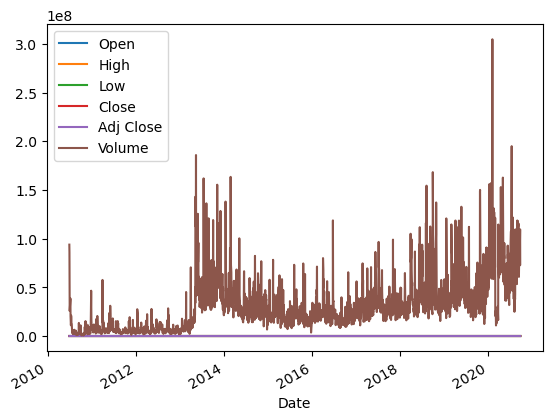

In [62]:
df_tsla.plot()

<Axes: xlabel='Date'>

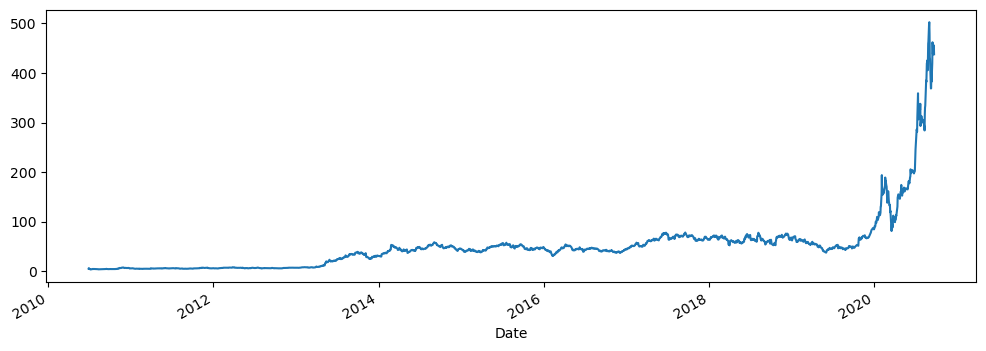

In [63]:
df_tsla['High'].plot(figsize = (12,4))

<Axes: xlabel='Date'>

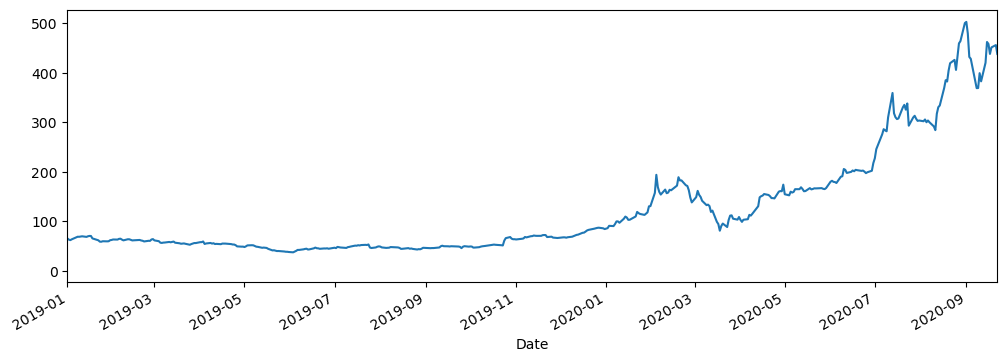

In [64]:
# Setting the X limit
df_tsla['High'].plot(xlim = ['2019,01,01', '2020-09-22'], figsize = (12,4))

<Axes: xlabel='Date'>

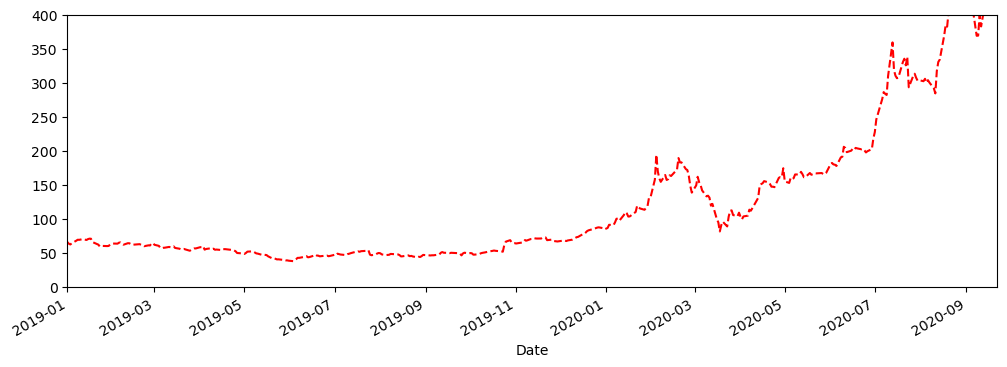

In [65]:
# Setting the Y limit
df_tsla['High'].plot(xlim = ['2019,01,01', '2020-09-22'], ylim = [0,400],
                     figsize = (12,4), c = 'red', ls='--')

In [66]:
df_tsla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14',
               '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18',
               '2020-09-21', '2020-09-22'],
              dtype='datetime64[ns]', name='Date', length=2577, freq=None)

In [67]:
# Reading data with particular index
df_tsla.loc['2020-01-01':'2020-09-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...
2020-08-26,412.000000,433.200012,410.726013,430.634003,430.634003,71197000
2020-08-27,436.092010,459.119995,428.500000,447.750000,447.750000,118465000
2020-08-28,459.023987,463.697998,437.303986,442.679993,442.679993,100406000


In [68]:
slice_index = df_tsla.loc['2020-01-01':'2020-09-01'].index
share_open = df_tsla.loc['2020-01-01':'2020-09-01']['Open']
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2020-08-26    412.000000
2020-08-27    436.092010
2020-08-28    459.023987
2020-08-31    444.609985
2020-09-01    502.140015
Name: Open, Length: 169, dtype: float64

In [69]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

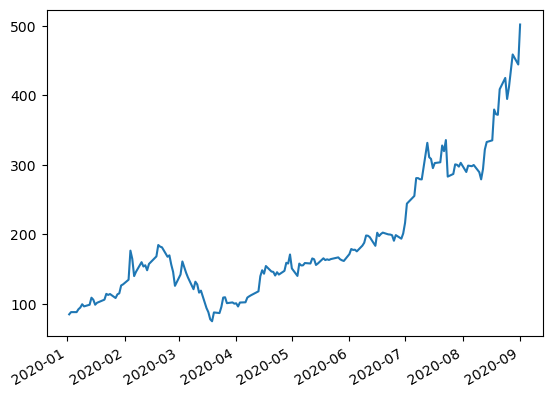

In [70]:
figure, axis = plt.subplots()
figure.autofmt_xdate() # Preventing overlap of X labels
axis.plot(slice_index, share_open)

In [71]:
## datetime
from datetime import datetime

In [83]:
date =  datetime(2024,5,14)

In [84]:
datetime.now()

datetime.datetime(2024, 5, 14, 9, 9, 21, 820212)

In [85]:
date.date()

datetime.date(2024, 5, 14)

In [86]:
date.day

14

In [87]:
date.weekday()

1

In [89]:
date.year

2024

### Time Resampling

In [90]:
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [91]:
df_tsla.resample(rule = 'A').min()
## Rule = 'A' Year end frequency

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,3.228000,3.326000,2.996000,3.160000,3.160000,592500
2011-12-31,4.356000,4.454000,4.222000,4.366000,4.366000,1198000
2012-12-31,5.324000,5.370000,4.528000,4.558000,4.558000,1824500
2013-12-31,6.616000,6.676000,6.422000,6.582000,6.582000,2201000
2014-12-31,28.100000,29.400000,27.334000,27.868000,27.868000,6661000
2015-12-31,37.166000,37.858002,36.279999,37.000000,37.000000,3540000
2016-12-31,28.464001,30.993999,28.209999,28.733999,28.733999,8297500
2017-12-31,42.950001,44.066002,42.192001,43.397999,43.397999,10933500
2018-12-31,50.556000,52.066002,48.917999,50.112000,50.112000,15403500


In [92]:
df_tsla.resample(rule = 'A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,7.174000,7.284000,6.950000,7.094000,7.094000,93831500
2011-12-31,6.926000,7.000000,6.806000,6.988000,6.988000,57589000
2012-12-31,7.638000,7.990000,7.422000,7.602000,7.602000,28402000
2013-12-31,38.792000,38.900002,37.674000,38.674000,38.674000,185819500
2014-12-31,57.534000,58.284000,56.080002,57.208000,57.208000,163408500
2015-12-31,56.040001,57.330002,55.259998,56.452000,56.452000,78248000
2016-12-31,53.290001,53.868000,50.902000,53.084000,53.084000,118712000
2017-12-31,77.337997,77.921997,75.870003,77.000000,77.000000,98957000
2018-12-31,75.000000,77.491997,73.424004,75.914001,75.914001,168248500


<Axes: xlabel='Date'>

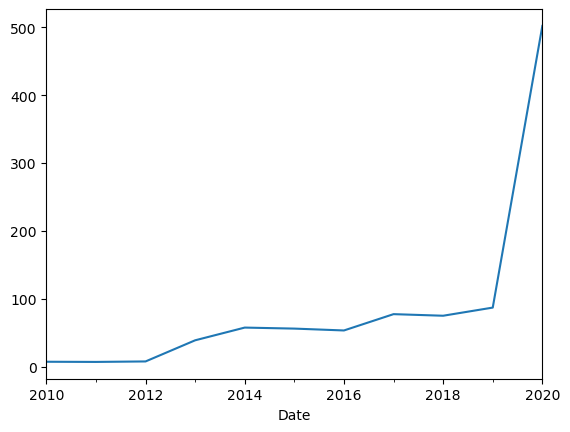

In [93]:
df_tsla.resample(rule = 'A').max()['Open'].plot()

In [94]:
# Quaterly end frequeny
df_tsla.resample(rule = 'QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,5.158000,6.084000,4.660000,4.778000,4.778000,93831500
2010-07-01,5.000000,5.184000,4.226000,4.396000,4.396000,41094000
2010-10-01,7.174000,7.284000,6.950000,7.094000,7.094000,46509500
2011-01-01,5.718000,5.742000,5.610000,5.690000,5.690000,57589000
2011-04-01,6.020000,6.300000,5.910000,6.028000,6.028000,31046000
2011-07-01,5.978000,6.088000,5.802000,5.946000,5.946000,15322500
2011-10-01,6.926000,7.000000,6.806000,6.988000,6.988000,19341500
2012-01-01,7.638000,7.990000,7.422000,7.588000,7.588000,27502000
2012-04-01,7.466000,7.694000,7.334000,7.602000,7.602000,27781500


<Axes: xlabel='Date'>

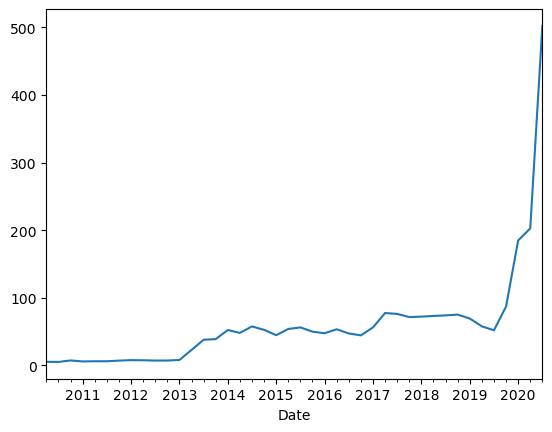

In [96]:
df_tsla.resample(rule = 'QS').max()['Open'].plot()

In [97]:
# BUsiness End Frequency

df_tsla.resample(rule = 'BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,7.174000,7.284000,6.950000,7.094000,7.094000,93831500
2011-12-30,6.926000,7.000000,6.806000,6.988000,6.988000,57589000
2012-12-31,7.638000,7.990000,7.422000,7.602000,7.602000,28402000
2013-12-31,38.792000,38.900002,37.674000,38.674000,38.674000,185819500
2014-12-31,57.534000,58.284000,56.080002,57.208000,57.208000,163408500
2015-12-31,56.040001,57.330002,55.259998,56.452000,56.452000,78248000
2016-12-30,53.290001,53.868000,50.902000,53.084000,53.084000,118712000
2017-12-29,77.337997,77.921997,75.870003,77.000000,77.000000,98957000
2018-12-31,75.000000,77.491997,73.424004,75.914001,75.914001,168248500


In [98]:
# BUsiness quaterly End Frequency

df_tsla.resample(rule = 'BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,5.158000,6.084000,4.660000,4.778000,4.778000,93831500
2010-07-01,5.000000,5.184000,4.226000,4.396000,4.396000,41094000
2010-10-01,7.174000,7.284000,6.950000,7.094000,7.094000,46509500
2011-01-03,5.718000,5.742000,5.610000,5.690000,5.690000,57589000
2011-04-01,6.020000,6.300000,5.910000,6.028000,6.028000,31046000
2011-07-01,5.978000,6.088000,5.802000,5.946000,5.946000,15322500
2011-10-03,6.926000,7.000000,6.806000,6.988000,6.988000,19341500
2012-01-02,7.638000,7.990000,7.422000,7.588000,7.588000,27502000
2012-04-02,7.466000,7.694000,7.334000,7.602000,7.602000,27781500


In [100]:
# Monthly End Frequency

df_tsla.resample(rule = 'M').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,5.158000,6.084000,4.660000,4.778000,4.778000,93831500
2010-07-31,5.000000,5.184000,4.212000,4.392000,4.392000,41094000
2010-08-31,4.390000,4.436000,4.170000,4.390000,4.390000,6406500
2010-09-30,4.430000,4.632000,4.226000,4.396000,4.396000,13422500
2010-10-31,4.278000,4.374000,4.210000,4.368000,4.368000,3304500
...,...,...,...,...,...,...
2020-05-31,166.899994,168.658005,163.141998,167.000000,167.000000,162659000
2020-06-30,202.556000,217.537994,200.746002,215.962006,215.962006,92817000
2020-07-31,335.790009,358.997986,312.399994,328.600006,328.600006,194927000


<Axes: xlabel='Date'>

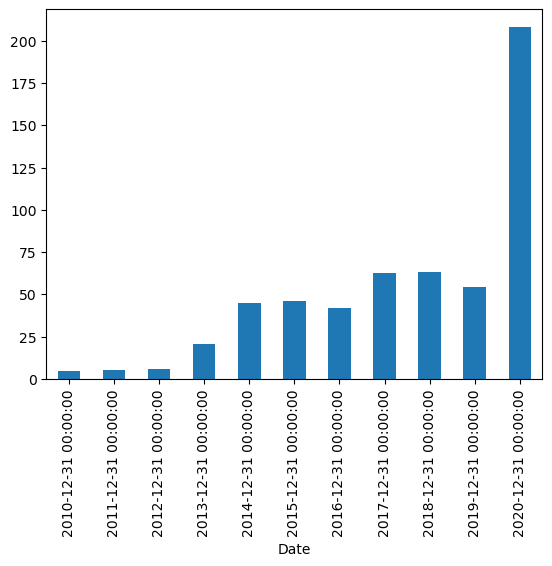

In [99]:
## PLotting for resample

df_tsla['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

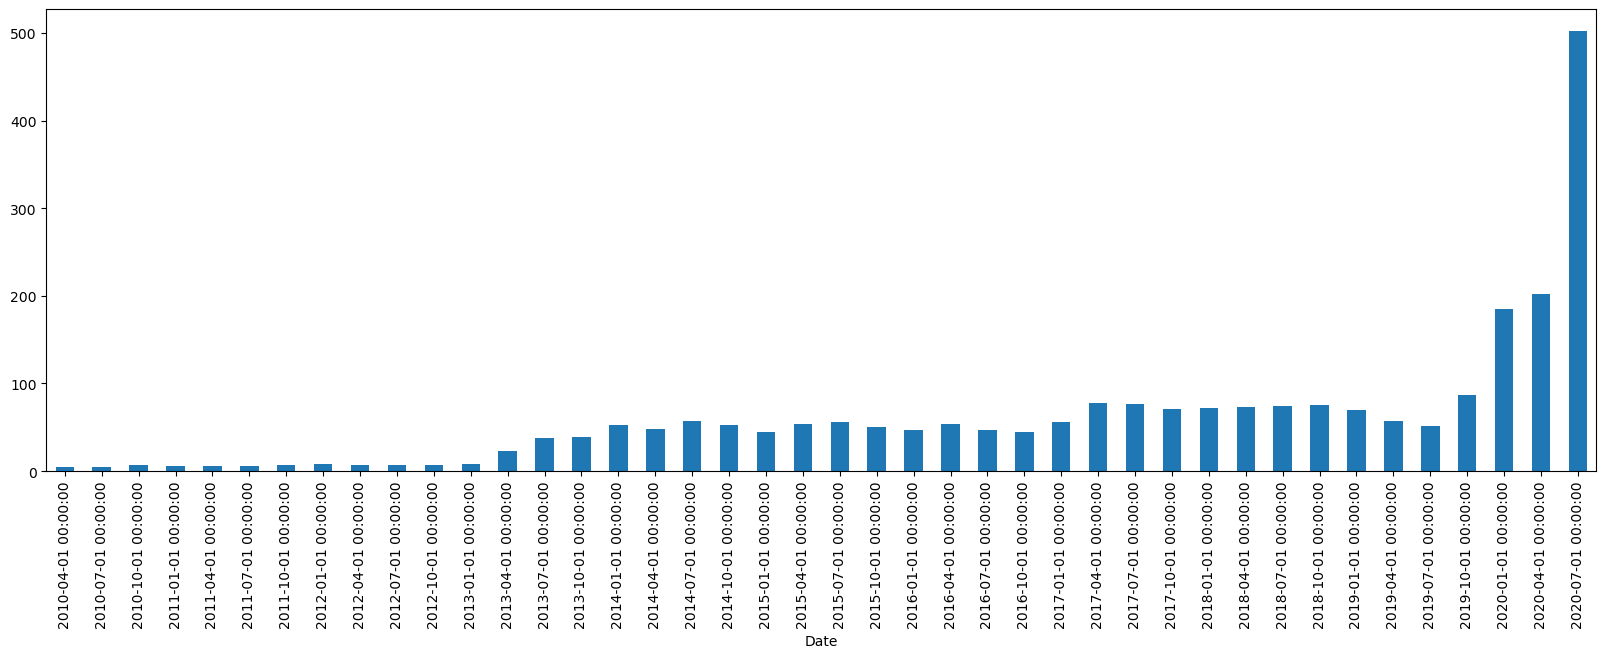

In [107]:
df_tsla['Open'].resample(rule = 'QS').max().plot(kind='bar', figsize=(20,6))

### Rolling

In [112]:
df_tsla['High'].head(20)

Date
2010-06-29    5.000
2010-06-30    6.084
2010-07-01    5.184
2010-07-02    4.620
2010-07-06    4.000
2010-07-07    3.326
2010-07-08    3.504
2010-07-09    3.580
2010-07-12    3.614
2010-07-13    3.728
2010-07-14    4.030
2010-07-15    4.300
2010-07-16    4.260
2010-07-19    4.450
2010-07-20    4.370
2010-07-21    4.180
2010-07-22    4.250
2010-07-23    4.312
2010-07-26    4.300
2010-07-27    4.236
Name: High, dtype: float64

In [113]:
df_tsla['High'].rolling(10).mean().head(20)

Date
2010-06-29       NaN
2010-06-30       NaN
2010-07-01       NaN
2010-07-02       NaN
2010-07-06       NaN
2010-07-07       NaN
2010-07-08       NaN
2010-07-09       NaN
2010-07-12       NaN
2010-07-13    4.2640
2010-07-14    4.1670
2010-07-15    3.9886
2010-07-16    3.8962
2010-07-19    3.8792
2010-07-20    3.9162
2010-07-21    4.0016
2010-07-22    4.0762
2010-07-23    4.1494
2010-07-26    4.2180
2010-07-27    4.2688
Name: High, dtype: float64

In [114]:

df_tsla['Open: 30 days rolling'] = df_tsla['Open'].rolling(30).mean()

In [115]:
df_tsla.head(32)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,NaN
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,NaN
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,NaN
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,NaN
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,NaN
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,NaN
2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000,NaN
2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500,NaN


In [ ]:
# Plotting with rolling data

<Axes: xlabel='Date'>

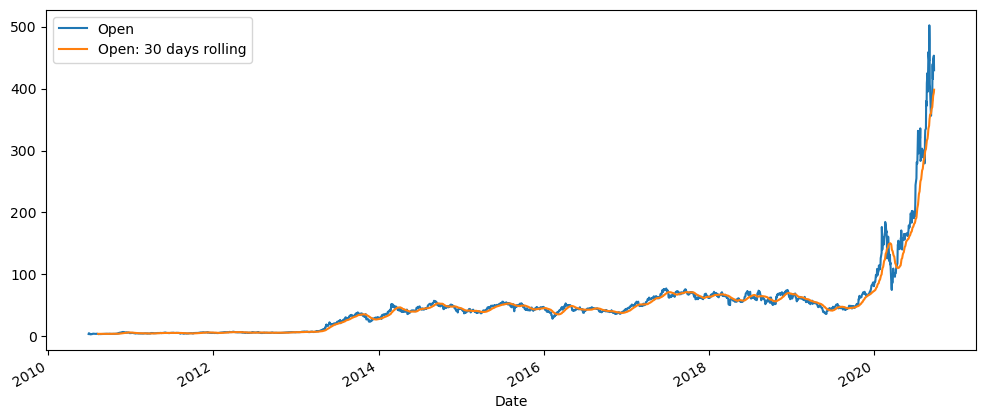

In [116]:
df_tsla[['Open', 'Open: 30 days rolling']].plot(figsize=(12,5))